# The effects of normalizing input on gradient descent

The following experiment explores the effects that normalizing the training data (as well as subsequent input used in inference) has on gradient descent. The common advice has been to normalize the input so that gradient descent converges faster. While I believe what has been said about it, I'm not sure I understand why this is.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import display, Markdown
import statistics as stats
import tensorflow as tf

<Container object of 6 artists>

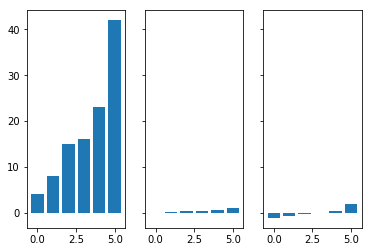

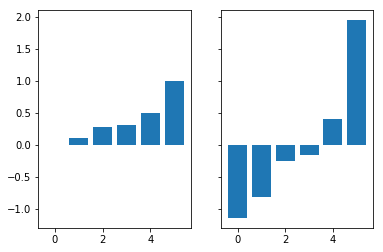

In [34]:
def scale(data):
    data_min = min(data)
    data_max = max(data)
    data_range = data_max - data_min
    
    return [(item - data_min) / data_range for item in data]


def std_score(data):
    mean = stats.mean(data)
    std_dev = stats.pstdev(data)
    
    return [(item - mean) / std_dev for item in data]
    
    
X = [4, 8, 15, 16, 23, 42]
X_norm = scale(X)
X_std = std_score(X)
Y = [x / 2 for x in X]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
height = range(len(X))
ax1.bar(height, X)
ax2.bar(height, X_norm)
ax3.bar(height, X_std)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
height = range(len(X))
ax1.bar(height, X_norm)
ax2.bar(height, X_std)

In [35]:
def short_print(data):
    md = ''
    for label, val in data.items():
        if md == '':
            md = '|  |  |\n|' + '---|'.join(['' for i in val]) + '\n'
        md += '| ' + label + ' | '
        for i in val:
            md += str(round(i, 2)) + ' | '
        md += '\n'
    display(Markdown(md))

short_print({'X': X, 'scaled': X_norm, 'std dev': X_std, 'Y': Y})

|  |  |
|---|---|---|---|---|
| X | 4 | 8 | 15 | 16 | 23 | 42 | 
| scaled | 0.0 | 0.11 | 0.29 | 0.32 | 0.5 | 1.0 | 
| std dev | -1.14 | -0.81 | -0.24 | -0.16 | 0.41 | 1.95 | 
| Y | 2.0 | 4.0 | 7.5 | 8.0 | 11.5 | 21.0 | 


In [42]:
x = tf.placeholder(tf.float32, shape=[1, len(X)])
y_ = tf.placeholder(tf.float32, shape=[1, len(Y)])

W = tf.Variable(tf.zeros([len(X), 1]))
cost = tf.matmul(x, W)

optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(cost)

init = tf.global_variables_initializer()


def train_step(steps=1):
    log = []
    with tf.Session() as session:
        session.run(init)
        
        for _ in range(steps):
            session.run(train, feed_dict={x: [X], y_: [Y]})
            log.append(session.run(W))
    return log

out = train_step(steps=3)
print(out)

[array([[-0.2       ],
       [-0.40000001],
       [-0.75      ],
       [-0.80000001],
       [-1.14999998],
       [-2.10000014]], dtype=float32), array([[-0.40000001],
       [-0.80000001],
       [-1.5       ],
       [-1.60000002],
       [-2.29999995],
       [-4.20000029]], dtype=float32), array([[-0.60000002],
       [-1.20000005],
       [-2.25      ],
       [-2.4000001 ],
       [-3.44999981],
       [-6.30000019]], dtype=float32)]


In [47]:
W2 = tf.Variable(0, dtype=tf.float32)
x2 = tf.placeholder(tf.float32)

# 
model = tf.add(W2, x2)

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(W2))
    for i in range(10):
        session.run(model, feed_dict={x2: i})
        print(session.run(W2))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
